In [88]:
import AccessControl
import importlib, itertools
importlib.reload(AccessControl)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [89]:
world = AccessControl.PriorityQueue()
learner = AccessControl.Learner(world=world)
learner.run(num_iter=400000)
    
diff_reward_best_action = -np.zeros((11, 4))
best_action = -np.zeros((11, 4))
for aval_server_idx, aval_server in enumerate(range(11)):
    for priority_idx, priority in enumerate([1,2,4,8]):
        state = AccessControl.QueueState(aval_server, priority)
        action_set = world.get_aval_action_set(state)
        r = -np.inf
        for action in action_set:
            if r < learner._state_action_value[(state, action)]:
                r = learner._state_action_value[(state, action)]
                best_action[aval_server_idx, priority_idx] = (action == 'drop')
        diff_reward_best_action[aval_server_idx, priority_idx] = r

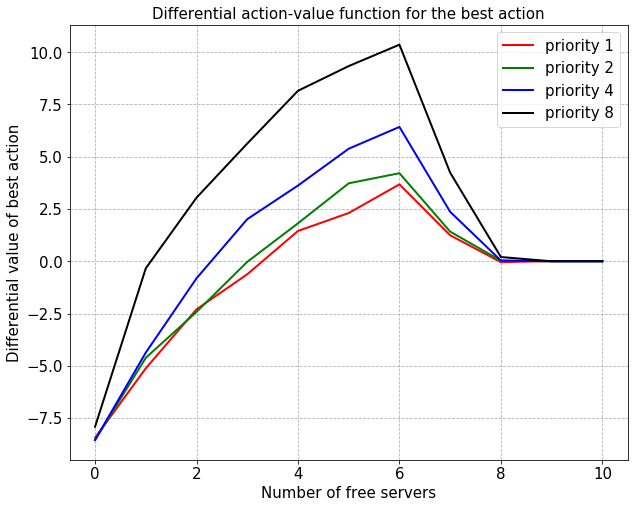

In [90]:
fig, ax = plt.subplots(figsize=(10,8))
fontsize = 15

ax.plot(range(11), diff_reward_best_action[:, 0], linewidth=2, linestyle='-', color='r', label='priority 1')
ax.plot(range(11), diff_reward_best_action[:, 1], linewidth=2, linestyle='-', color='g', label='priority 2')
ax.plot(range(11), diff_reward_best_action[:, 2], linewidth=2, linestyle='-', color='b', label='priority 4')
ax.plot(range(11), diff_reward_best_action[:, 3], linewidth=2, linestyle='-', color='k', label='priority 8')

ax.grid(linestyle='--')
ax.legend(loc='best', fontsize=fontsize)
ax.set_xlabel('Number of free servers', fontsize=fontsize)
ax.set_ylabel('Differential value of best action', fontsize=fontsize)
ax.set_title('Differential action-value function for the best action', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
plt.show()

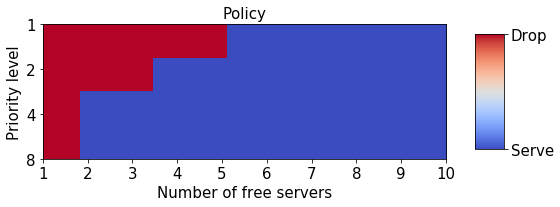

In [94]:
fig = plt.figure(figsize=(8,8))
fontsize = 15
ax_image = fig.add_axes([0.1,0.15,0.7,0.7])
ax_color = fig.add_axes([0.85,0.4,0.05,0.2])
image = ax_image.imshow(best_action.T, 
                        cmap=cm.coolwarm,
                        extent=[1, 10, 1, 4])
ax_image.set_xticks(np.arange(1,11,1).astype(int))
ax_image.set_yticks(np.arange(4,0,-1).astype(int))
ax_image.set_yticklabels([1,2,4,8])
ax_image.set_xlabel('Number of free servers', fontsize=fontsize)
ax_image.set_ylabel('Priority level', fontsize=fontsize)
ax_image.set_title('Policy', fontsize=fontsize)
ax_image.tick_params(labelsize=fontsize)
ax_color.tick_params(labelsize=fontsize)
image.set_clim(vmin=0, vmax=1)
cbar = fig.colorbar(image, cax=ax_color, 
                    ticks=[1,0],
                    orientation='vertical')
cbar.ax.set_yticklabels(['Drop', 'Serve'])
    
plt.show()